#Import Library

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


*   Pandas digunakan untuk mengubah dataset menjadi dataframe dan memanipulasi dalam bentuk tersebut
*   Numpy digunakan untuk memanipulasi data
*   LabelEncoder digunakan untuk mengubah label yang berupa category menjadi angka
*   NLTK merupakan rangkaian beberapa library dan program untuk NLP dalam bahasa inggris

#Import Dataset

In [ ]:
data = pd.read_excel('tweet_filtered.xlsx')
df = pd.DataFrame(data)
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,#IPad2 's â€˜#SmartCoverâ€™ Opens to Instant A...,Positive emotion
1,&quot;via @mention : {link} Guy Kawasaki talks...,No emotion toward brand or product
2,#HP opens &quot;Mobile Park&quot; &amp; Conte...,No emotion toward brand or product
3,"Unboxing. #Apple #sxsw @mention Apple Store, ...",No emotion toward brand or product
4,"#SXSW and #Apple iPad 2's are great, but thoug...",Positive emotion
...,...,...
1068,I think my effing hubby is in line for an #iPa...,Negative emotion
1069,This is my friend @mention new #iphone #photos...,Positive emotion
1070,@mention yay :) thank you! what do you do? #pu...,No emotion toward brand or product
1071,"@mention Yes, that's why I favorited it! I wan...",Positive emotion


#Data Preprocessing

In [ ]:
import re, string

# untuk data yang sudah diprocess
df['Clean text'] = df['tweet_text']

# mengubah text menjadi lowercase / casefolding
df = df.applymap(str.lower)

# menghilangkan angka
df['Clean text'] = df['tweet_text'].str.replace(r'\d+','')

# menghilangkan tanda baca
df['Clean text'] = df['tweet_text'].str.replace('[^\w\s]','')

# menghilangkan spasi
df['Clean text'] = df['tweet_text'].str.strip()

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,Clean text
0,#ipad2 's â€˜#smartcoverâ€™ opens to instant a...,positive emotion,#ipad2 's â€˜#smartcoverâ€™ opens to instant a...
1,&quot;via @mention : {link} guy kawasaki talks...,no emotion toward brand or product,&quot;via @mention : {link} guy kawasaki talks...
2,#hp opens &quot;mobile park&quot; &amp; conte...,no emotion toward brand or product,#hp opens &quot;mobile park&quot; &amp; conte...
3,"unboxing. #apple #sxsw @mention apple store, ...",no emotion toward brand or product,"unboxing. #apple #sxsw @mention apple store, ..."
4,"#sxsw and #apple ipad 2's are great, but thoug...",positive emotion,"#sxsw and #apple ipad 2's are great, but thoug..."
...,...,...,...
1068,i think my effing hubby is in line for an #ipa...,negative emotion,i think my effing hubby is in line for an #ipa...
1069,this is my friend @mention new #iphone #photos...,positive emotion,this is my friend @mention new #iphone #photos...
1070,@mention yay :) thank you! what do you do? #pu...,no emotion toward brand or product,@mention yay :) thank you! what do you do? #pu...
1071,"@mention yes, that's why i favorited it! i wan...",positive emotion,"@mention yes, that's why i favorited it! i wan..."


In [ ]:
# tokenizing kata
df['Clean text'] = df['Clean text'].apply(nltk.word_tokenize)
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,Clean text
0,#ipad2 's â€˜#smartcoverâ€™ opens to instant a...,positive emotion,"[#, ipad2, 's, â€˜, #, smartcoverâ€™, opens, t..."
1,&quot;via @mention : {link} guy kawasaki talks...,no emotion toward brand or product,"[&, quot, ;, via, @, mention, :, {, link, }, g..."
2,#hp opens &quot;mobile park&quot; &amp; conte...,no emotion toward brand or product,"[#, hp, opens, &, quot, ;, mobile, park, &, qu..."
3,"unboxing. #apple #sxsw @mention apple store, ...",no emotion toward brand or product,"[unboxing, ., #, apple, #, sxsw, @, mention, a..."
4,"#sxsw and #apple ipad 2's are great, but thoug...",positive emotion,"[#, sxsw, and, #, apple, ipad, 2, 's, are, gre..."
...,...,...,...
1068,i think my effing hubby is in line for an #ipa...,negative emotion,"[i, think, my, effing, hubby, is, in, line, fo..."
1069,this is my friend @mention new #iphone #photos...,positive emotion,"[this, is, my, friend, @, mention, new, #, iph..."
1070,@mention yay :) thank you! what do you do? #pu...,no emotion toward brand or product,"[@, mention, yay, :, ), thank, you, !, what, d..."
1071,"@mention yes, that's why i favorited it! i wan...",positive emotion,"[@, mention, yes, ,, that, 's, why, i, favorit..."


In [ ]:
# stopword removal
stop_words = set(stopwords.words('english'))
df['Clean text']= df['Clean text'].apply(lambda x: [i for i in x if i not in stop_words])
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,Clean text
0,#ipad2 's â€˜#smartcoverâ€™ opens to instant a...,positive emotion,"[#, ipad2, 's, â€˜, #, smartcoverâ€™, opens, i..."
1,&quot;via @mention : {link} guy kawasaki talks...,no emotion toward brand or product,"[&, quot, ;, via, @, mention, :, {, link, }, g..."
2,#hp opens &quot;mobile park&quot; &amp; conte...,no emotion toward brand or product,"[#, hp, opens, &, quot, ;, mobile, park, &, qu..."
3,"unboxing. #apple #sxsw @mention apple store, ...",no emotion toward brand or product,"[unboxing, ., #, apple, #, sxsw, @, mention, a..."
4,"#sxsw and #apple ipad 2's are great, but thoug...",positive emotion,"[#, sxsw, #, apple, ipad, 2, 's, great, ,, tho..."
...,...,...,...
1068,i think my effing hubby is in line for an #ipa...,negative emotion,"[think, effing, hubby, line, #, ipad, 2., some..."
1069,this is my friend @mention new #iphone #photos...,positive emotion,"[friend, @, mention, new, #, iphone, #, photos..."
1070,@mention yay :) thank you! what do you do? #pu...,no emotion toward brand or product,"[@, mention, yay, :, ), thank, !, ?, #, pushio..."
1071,"@mention yes, that's why i favorited it! i wan...",positive emotion,"[@, mention, yes, ,, 's, favorited, !, want, w..."


In [ ]:
# lemmatization
lemmatizer = WordNetLemmatizer()
df['Clean text'] = df['Clean text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,Clean text
0,#ipad2 's â€˜#smartcoverâ€™ opens to instant a...,positive emotion,"[#, ipad2, 's, â€˜, #, smartcoverâ€™, open, in..."
1,&quot;via @mention : {link} guy kawasaki talks...,no emotion toward brand or product,"[&, quot, ;, via, @, mention, :, {, link, }, g..."
2,#hp opens &quot;mobile park&quot; &amp; conte...,no emotion toward brand or product,"[#, hp, open, &, quot, ;, mobile, park, &, quo..."
3,"unboxing. #apple #sxsw @mention apple store, ...",no emotion toward brand or product,"[unboxing, ., #, apple, #, sxsw, @, mention, a..."
4,"#sxsw and #apple ipad 2's are great, but thoug...",positive emotion,"[#, sxsw, #, apple, ipad, 2, 's, great, ,, tho..."
...,...,...,...
1068,i think my effing hubby is in line for an #ipa...,negative emotion,"[think, effing, hubby, line, #, ipad, 2., some..."
1069,this is my friend @mention new #iphone #photos...,positive emotion,"[friend, @, mention, new, #, iphone, #, photos..."
1070,@mention yay :) thank you! what do you do? #pu...,no emotion toward brand or product,"[@, mention, yay, :, ), thank, !, ?, #, pushio..."
1071,"@mention yes, that's why i favorited it! i wan...",positive emotion,"[@, mention, yes, ,, 's, favorited, !, want, w..."


In [ ]:
# label encoding
le = LabelEncoder()
df.is_there_an_emotion_directed_at_a_brand_or_product = le.fit_transform(df.is_there_an_emotion_directed_at_a_brand_or_product)
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,Clean text
0,#ipad2 's â€˜#smartcoverâ€™ opens to instant a...,2,"[#, ipad2, 's, â€˜, #, smartcoverâ€™, open, in..."
1,&quot;via @mention : {link} guy kawasaki talks...,1,"[&, quot, ;, via, @, mention, :, {, link, }, g..."
2,#hp opens &quot;mobile park&quot; &amp; conte...,1,"[#, hp, open, &, quot, ;, mobile, park, &, quo..."
3,"unboxing. #apple #sxsw @mention apple store, ...",1,"[unboxing, ., #, apple, #, sxsw, @, mention, a..."
4,"#sxsw and #apple ipad 2's are great, but thoug...",2,"[#, sxsw, #, apple, ipad, 2, 's, great, ,, tho..."
...,...,...,...
1068,i think my effing hubby is in line for an #ipa...,0,"[think, effing, hubby, line, #, ipad, 2., some..."
1069,this is my friend @mention new #iphone #photos...,2,"[friend, @, mention, new, #, iphone, #, photos..."
1070,@mention yay :) thank you! what do you do? #pu...,1,"[@, mention, yay, :, ), thank, !, ?, #, pushio..."
1071,"@mention yes, that's why i favorited it! i wan...",2,"[@, mention, yes, ,, 's, favorited, !, want, w..."


#Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['tweet_text'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
vectorized_datasets = pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Modeling using Multinomial Naive Bayes

In [ ]:
# memisahkan variabel dependent dan independent

X = vectorized_datasets.iloc[:, :-1]    # independent varible
y = df['is_there_an_emotion_directed_at_a_brand_or_product'].values   # dependent variable

In [ ]:
# Spliting Dataset untuk training dan testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# multinomial naive bayes

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [ ]:
# perbandingan ground truth dan hasil

df_trained = pd.DataFrame({
    'y ground truth' : Y_test,
    'y predict' : y_pred,
})

df_trained

,y ground truth,y predict
0,1,1
1,2,2
2,1,2
3,1,1
4,1,1
...,...,...
210,2,2
211,2,1
212,2,1
213,1,1


# Evaluasi

In [ ]:
# melihat akurasi

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.64      0.94      0.76       127
           2       0.64      0.22      0.33        81

    accuracy                           0.64       215
   macro avg       0.43      0.39      0.36       215
weighted avg       0.62      0.64      0.57       215



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




*   Hasilnya masih kurang baik
*   Bisa karena datanya (jumlah dan pembagian data yang kurang baik) atau karena metodenya
*   Datanya masih bisa dibersihkan dari karakter special



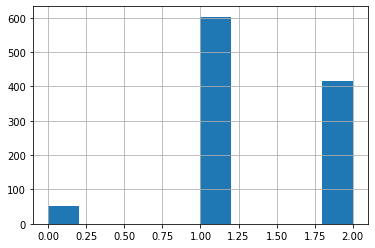

In [ ]:
# melihat jumlah data untuk setiap classnya
df['is_there_an_emotion_directed_at_a_brand_or_product'].hist()